In [1]:
# try to find the highest probobility of prediction for branchynet easy data.

# Then use this data for training. 


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict,cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic, WhiteKernel, Matern
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
import joblib
import matplotlib.pylab as pylab
import matplotlib as mpl
from sklearn.linear_model import RandomizedLasso
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

#pandas
import pandas as pd
import math
from math import sqrt
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import sys
from enum import Enum

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from tensorflow import keras

In [17]:
#https://www.kaggle.com/aakashnain/kmnist-mnist-replacement
# Let us define some paths first
input_path = "datasets/data/kmnist/"

# Path to training images and corresponding labels provided as numpy arrays
kmnist_train_images_path = input_path+"kmnist-train-imgs.npz"
kmnist_train_labels_path = input_path+"kmnist-train-labels.npz"

# Path to the test images and corresponding labels
kmnist_test_images_path = input_path+"kmnist-test-imgs.npz"
kmnist_test_labels_path = input_path+"kmnist-test-labels.npz"

# Load the training data from the corresponding npz files
kmnist_train_images = np.load(kmnist_train_images_path)['arr_0']
kmnist_train_labels = np.load(kmnist_train_labels_path)['arr_0']

# Load the test data from the corresponding npz files
kmnist_test_images = np.load(kmnist_test_images_path)['arr_0']
kmnist_test_labels = np.load(kmnist_test_labels_path)['arr_0']

print("Number of training samples: {} where each sample is of size: {}".format(
    len(kmnist_train_images), kmnist_train_images.shape[1:] ))
print("Number of test samples: {} where each sample is of size: {}".format(
    len(kmnist_test_images), kmnist_test_images.shape[1:]))

X_train = kmnist_train_images.reshape(60000, 1, 28, 28)
X_test = kmnist_test_images.reshape(10000, 1, 28, 28)
Y_train = kmnist_train_labels
Y_test = kmnist_test_labels
print("x_train shape:", X_train.shape, "y_train shape:", Y_train.shape)

Number of training samples: 60000 where each sample is of size: (28, 28)
Number of test samples: 10000 where each sample is of size: (28, 28)
('x_train shape:', (60000, 1, 28, 28), 'y_train shape:', (60000,))


In [18]:
#!pip install seaborn
import seaborn as sns

# Get the unique labels
labels = np.unique(kmnist_train_labels)

# Get the frequency count for each label
frequency_count = np.bincount(kmnist_train_labels)

# Visualize 
plt.figure(figsize=(10,5))
sns.barplot(x=labels, y=frequency_count);
plt.title("Distribution of labels in KMNIST training data", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

ImportError: cannot import name utils

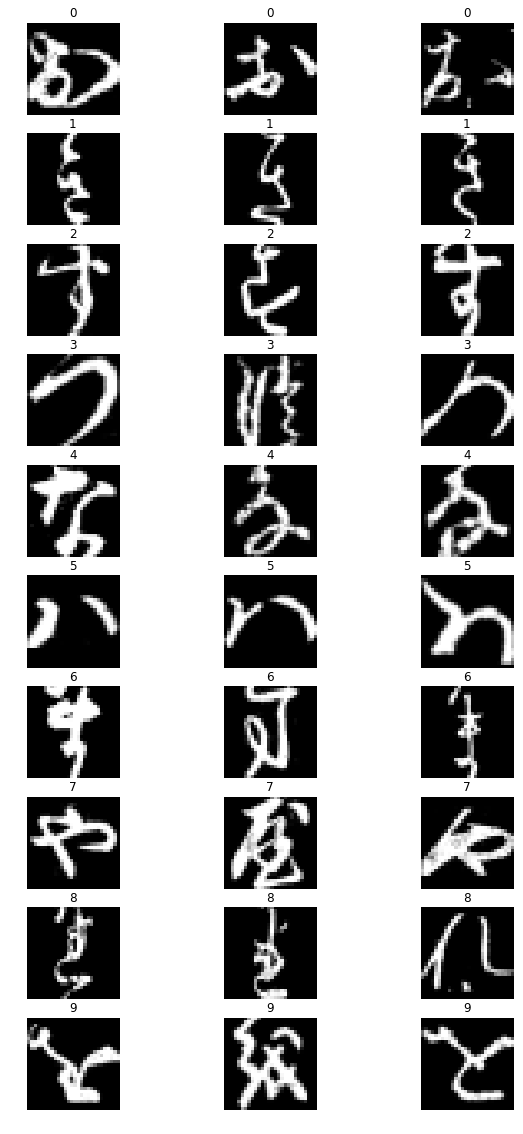

In [19]:
# Let's see how the images for different labels look like
random_samples = []
for i in range(10):
    samples = kmnist_train_images[np.where(kmnist_train_labels==i)][:3]
    random_samples.append(samples)

# Converting list into a numpy array
random_samples = np.array(random_samples)

# Visualize the samples
f, ax = plt.subplots(10,3, figsize=(10,20))
for i, j in enumerate(random_samples):
    ax[i, 0].imshow(random_samples[i][0,:,:], cmap='gray')
    ax[i, 1].imshow(random_samples[i][1,:,:], cmap='gray')
    ax[i, 2].imshow(random_samples[i][2,:,:], cmap='gray')
    
    ax[i,0].set_title(str(i))
    ax[i,0].axis('off')
    ax[i,0].set_aspect('equal')
    
    ax[i,1].set_title(str(i))
    ax[i,1].axis('off')
    ax[i,1].set_aspect('equal')
    
    ax[i,2].set_title(str(i))
    ax[i,2].axis('off')
    ax[i,2].set_aspect('equal')
plt.show()


In [20]:
# read training and test data from local disk
data_dir = "/home/peng/cooperating/project/data_model1/k_mnist/"
# read training data
number_of_samples = 60000

y_train_data = np.loadtxt(data_dir + "y_train.txt")
y_train = y_train_data.reshape(number_of_samples, 1)
y_train = pd.DataFrame(data=y_train, index=None, columns=None)

# read testing data
number_of_samples = 10000
#x_test_all = np.loadtxt(data_dir + "x_data_test.txt").reshape(number_of_samples, 1, 28, 28)
#x_data = [x.flatten() for x in x_data ]
#x_test_all = pd.DataFrame(data=x_data, index=None, columns=None)   

y_test_data = np.loadtxt(data_dir + "y_test.txt")
y_test = y_test_data.reshape(number_of_samples, 1)
y_test = pd.DataFrame(data=y_test, index=None, columns=None)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


((60000, 1, 28, 28), (60000, 1), (10000, 1, 28, 28), (10000, 1))


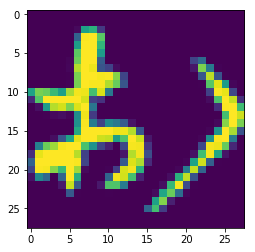

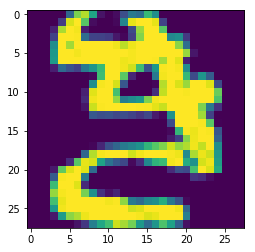

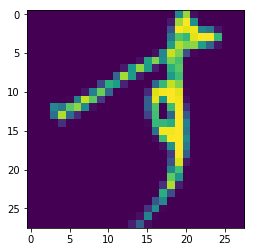

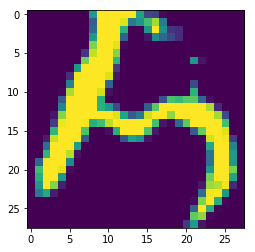

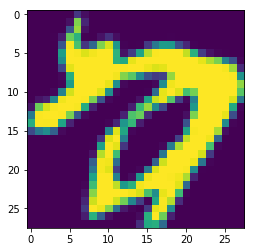

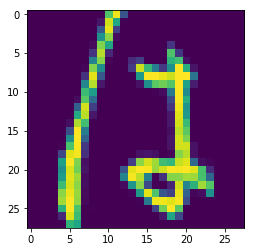

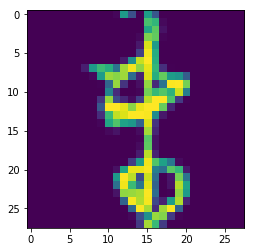

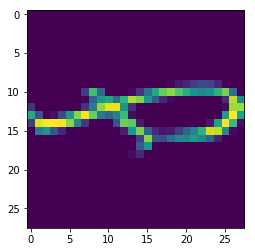

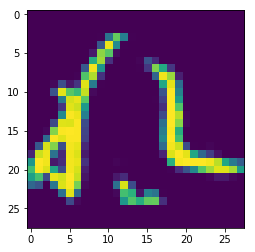

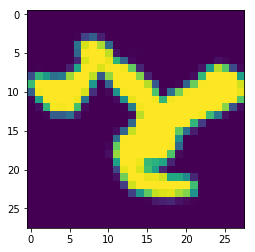

In [21]:
x_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:]))) /255.0
x_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:]))) /255.0

x_train_all = []
y_train_all = []

x_test_all = []
y_test_all = []


for i in range(10):
    x_train_all.append(x_train[Y_train == i])
    y_train_all.append(y_train[Y_train == i])
    x_test_all.append(x_test[Y_test == i])
    y_test_all.append(y_test[Y_test == i])
    
simplest_index = [579, 274, 547, 824, 273, 760, 569, 86, 505, 610]
simplest_index = [396, 909, 471, 937, 799, 437, 645, 847, 772, 227]
for i in range(10):
    plt.imshow(X_train[Y_train == i][simplest_index[i]].reshape(28, 28))
    plt.show()

In [22]:
# training data for autoencoder..
x_train_easy = []
x_train_hard = []
x_test_easy = []
x_test_hard = []
x_tmptest_easy = []


num_classes = 10

# use only half of the output classes to train one autoencoder. 
# first half : range(int(num_classes/2))
# second half : range(int(num_classes/2), num_classes)

y_trndata_easy = []
y_trndata_hard = []
y_testdata_easy = []
y_testdata_hard = []

#for i in range(int(num_classes/2), num_classes):
for i in range(int(num_classes)):

    trn_easy = x_train_all[i][y_train_all[i][0]==0]
    trn_hard = x_train_all[i][y_train_all[i][0]>0]
    
    print(i, trn_easy.shape, trn_hard.shape)

    test_easy = x_test_all[i][y_test_all[i][0]==0]
    test_hard = x_test_all[i][y_test_all[i][0]>0]
    test_easy_tmp = x_test_all[i][y_test_all[i][0]==0]
    
    # there are more easy examples than hard examples
    n1 = trn_hard.shape[0]
    n2 = trn_easy.shape[0]
    #trn_easy = trn_easy[0:n1]
    #trn_hard = trn_hard[0:n1]
    
    while 2*n1 > n2:
        trn_easy = np.concatenate((trn_easy, trn_easy), axis=0)
        n2 = trn_easy.shape[0]
        
    trn_hard = np.concatenate((trn_hard[0:n1],  trn_easy[n1:n2]), axis=0)
    
    
    n3 = test_hard.shape[0]
    n4 = test_easy.shape[0]
    test_hard = np.concatenate((test_hard[0:n3], test_easy[n3:n4]), axis=0)
    #test_easy = test_easy[0:n2]
    #test_hard = test_hard[0:n2]
    #trn_easy = np.concatenate((trn_hard[0:n1], trn_easy), axis=0)
    
    for j in range(0,n2):
        #trn_easy[j] = trn_easy[-1] 
        trn_easy[j] = x_train_all[i][simplest_index[i]]
    #test_easy = np.concatenate((test_hard[0:n3], test_easy), axis=0)  
    
    for j in range(0,n4):
        #test_easy[j] = trn_easy[-1]
        test_easy[j] = x_train_all[i][simplest_index[i]]
    x_train_easy.append(trn_easy)
    x_train_hard.append(trn_hard)
    
    
    # testing data
    x_test_easy.append(test_easy)
    x_test_hard.append(test_hard)
    y_trndata_hard += [i for _ in (y_train_all[i][0]>0) if _ is True]
    y_testdata_easy += [i for _ in (y_test_all[i][0]==0) if _ is True]
    #y_testdata_easy = [i for _ in (y_test_all[i][0]>0) if _ is True] + y_testdata_easy

    #y_testdata_hard += [i for _ in (y_test_all[i][0]>0) if _ is True]

x_trndata_easy = np.concatenate(x_train_easy)
x_trndata_hard = np.concatenate(x_train_hard)
x_testdata_easy = np.concatenate(x_test_easy)
x_testdata_hard = np.concatenate(x_test_hard)

print (x_trndata_easy.shape, x_trndata_hard.shape, x_testdata_easy.shape, x_testdata_hard.shape, len(y_testdata_easy))

for i in range(5):
    print (i, x_train_easy[i].shape[0])
    print (i, x_train_hard[i].shape[0])


 

(0, (4904, 784), (1096, 784))
(1, (4703, 784), (1297, 784))
(2, (3819, 784), (2181, 784))
(3, (4894, 784), (1106, 784))
(4, (4321, 784), (1679, 784))
(5, (4973, 784), (1027, 784))
(6, (3731, 784), (2269, 784))
(7, (4845, 784), (1155, 784))
(8, (4873, 784), (1127, 784))
(9, (5151, 784), (849, 784))
((53764, 784), (53764, 784), (6308, 784), (6308, 784), 6308)
(0, 4904)
(0, 4904)
(1, 4703)
(1, 4703)
(2, 7638)
(2, 7638)
(3, 4894)
(3, 4894)
(4, 4321)
(4, 4321)


In [23]:
from branchynet.net import BranchyNet
from branchynet.links import *
import chainer.functions as F
import chainer.links as L
from branchynet import utils, visualize
from chainer import cuda
import dill
import psutil
import time

def measure_performance_LeNet(X, Y):
    # load branchynet
    branchyNet = None
    with open("_models/lenet_k_mnist.bn", "rb") as f:
        branchyNet = dill.load(f)
    #set network to inference mode, this is fob_test_data_yr measuring baseline function. 
    branchyNet.testing()
    branchyNet.verbose = False

    #branchyNet.to_cpu()
    TEST_BATCHSIZE = 10    
    
    
    branchyNet.to_cpu()
    c_baseacc, c_basediff, _, _ = utils.test(branchyNet, X, Y, main=True, batchsize=TEST_BATCHSIZE)
    
    print("LeNet accuracy is ", c_baseacc)
    print("LeNet time is ", c_basediff)
    print("\n")
    return c_baseacc, c_basediff

def measure_performance_branchynet(X, Y,threshold=0):
    # load branchynet
    branchyNet = None
    with open("_models/lenet_k_mnist.bn", "rb") as f:
        branchyNet = dill.load(f)
    #set network to inference mode, this is fob_test_data_yr measuring baseline function. 
    branchyNet.testing()
    branchyNet.verbose = False

    #branchyNet.to_cpu()
    TEST_BATCHSIZE = 10    
    thresholds = [0.025+threshold]
    #print(decoded_imgs.shape)
    
    cpu_time_a = (time.time(), psutil.cpu_times())
    
    branchyNet.to_cpu()
    c_ts, c_accs, c_diffs, c_exits  = utils.screen_branchy(branchyNet, X, Y, thresholds,
                                                       batchsize=TEST_BATCHSIZE, verbose=False)
    c_diffs *= len(Y)

    print("accuracy is ", c_accs)
    print("branchyNet time is ", c_diffs)
    print("the distribution of exit number is ", c_exits)
    
    cpu_time_b = (time.time(), psutil.cpu_times())
    print 'CPU used in %d seconds: %s' % (
        cpu_time_b[0] - cpu_time_a[0],
        calculate(cpu_time_a[1], cpu_time_b[1])
    )
    print("\n")
    return c_accs, c_diffs
# show some easy data and hard data


def measure_perf_and_time(X_test_tmp, Y_test_tmp, data_tmp_shape, threshold=0.5):
    
    b_test_data_x = X_test_tmp.reshape(data_tmp_shape)/255.0


    cpu_time_a = (time.time(), psutil.cpu_times())
    
    start = time.time()
    decoded_imgs = autoencoder.predict(b_test_data_x)
    decoded_imgs *= 255.0

    end = time.time()
    
    cpu_time_b = (time.time(), psutil.cpu_times())
    print 'CPU used in %d seconds: %s' % (
        cpu_time_b[0] - cpu_time_a[0],
        calculate(cpu_time_a[1], cpu_time_b[1])
    )
    
    acc, c_diff = measure_performance_branchynet(decoded_imgs.reshape(-1, 1, 28,28), Y_test_tmp, threshold=threshold)

    print("total time(s) is ", end - start + c_diff)

    print("\n")
    return acc, end - start + c_diff




# show some easy data and hard data

def show_all(X_easy, X_hard, length = 100):
    n = 40
    for shift in range(0, length, 40):
        plt.figure(figsize=(20, 4))
        for i in range(1, n + 1):
            # Display original
            ax = plt.subplot(n/20, 20, i)
            plt.imshow(X_easy[shift+i-1].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()
    
        plt.figure(figsize=(20, 4))
        for i in range(1, n + 1):
            # Display original
            ax = plt.subplot(n/20, 20, i)
            plt.imshow(X_hard[shift+i-1].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()
        print("---------------------***********************************************--------------")
#Verify by branchynet



def calculate(t1, t2):
    # from psutil.cpu_percent()
    # see: https://github.com/giampaolo/psutil/blob/master/psutil/__init__.py
    t1_all = sum(t1)
    t1_busy = t1_all - t1.idle
    t2_all = sum(t2)
    t2_busy = t2_all - t2.idle
    if t2_busy <= t1_busy:
        return 0.0
    busy_delta = t2_busy - t1_busy
    all_delta = t2_all - t1_all
    busy_perc = (busy_delta / all_delta) * 100
    return round(busy_perc, 1)


In [24]:
# this experiment for simple autoencoder

In [25]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_ground,valid_ground = train_test_split(x_trndata_hard,
                                                              x_trndata_easy,
                                                              test_size=0.2,
                                                              random_state=13)
train_X, train_ground, valid_X, valid_ground = x_trndata_hard, x_trndata_easy, x_testdata_hard,  x_testdata_easy
print(train_X.shape, train_ground.shape, valid_X.shape, valid_ground.shape)

((53764, 784), (53764, 784), (6308, 784), (6308, 784))


In [26]:
#autoencoder 
from tensorflow.keras import regularizers



input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
#encoded = layers.Dense(512, activation='relu',activity_regularizer=regularizers.l1(10e-8))(input_img)
#encoded = layers.Dense(384, activation='relu',activity_regularizer=regularizers.l1(10e-8))(encoded)
#encoded = layers.Dense(256, activation='relu',activity_regularizer=regularizers.l1(10e-8))(encoded)
#encoded = layers.Dense(64, activation='linear',activity_regularizer=regularizers.l1(10e-8))(encoded)
#decoded = layers.Dense(784, activation='sigmoid')(encoded)
encoded = layers.Dense(512, activation='relu',activity_regularizer=regularizers.l1(10e-8))(input_img)
encoded = layers.Dense(384, activation='linear',activity_regularizer=regularizers.l1(10e-8))(encoded)
encoded = layers.Dense(32, activation='linear',activity_regularizer=regularizers.l1(10e-8))(encoded)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(train_X, train_ground,
                epochs=100,
                batch_size=512,
                shuffle=True,
                validation_data=(valid_X,valid_ground))

data_shape = (X_test.shape[0], 784)

Train on 53764 samples, validate on 6308 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
53764/53764 [==============================] - 7s 130us/sample - loss: 0.3557 - val_loss: 0.2987
Epoch 2/100
53764/53764 [==============================] - 4s 74us/sample - loss: 0.1809 - val_loss: 0.2401
Epoch 3/100
53764/53764 [==============================] - 4s 82us/sample - loss: 0.1521 - val_loss: 0.2191
Epoch 4/100
53764/53764 [==============================] - 4s 82us/sample - loss: 0.1412 - val_loss: 0.2180
Epoch 5/100
53764/53764 [==============================] - 5s 101us/sample - loss: 0.1369 - val_loss: 0.2102
Epoch 6/100
53764/53764 [==============================] - 5s 100us/sample - loss: 0.1314 - val_loss: 0.1996
Epoch 7/100
53764/53764 [==============================] - 5s 99us/sample - loss: 0.1267 - val_loss: 0.1988
Epoch 8/100
53764/53764 [==============================] - 5s 94us/sample - loss: 0.1252 - val_loss: 0.1985
Epoch 9/100
53764/53764 [===========

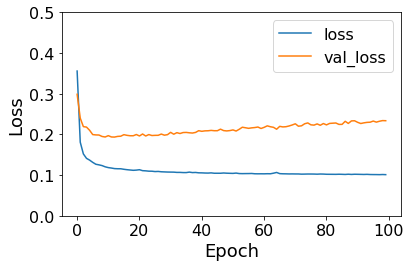

In [27]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('axes',edgecolor='black')

plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('Peng/peng/paper_figures/{}.pdf'.format('Autoencode-loss-kmnist')) 
plt.show()

In [ ]:
# GridSearch for best configuration.
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import datasets, layers, models, regularizers
import tensorflow as tf
from tensorflow import keras

def autoencoder_model(activation1, activation2, activation3, optimizer, unit1, unit2, unit3):
    input_img = keras.Input(shape=(784,))
    # "encoded" is the encoded representation of the input
    encoded = layers.Dense(unit1, activation=activation1, activity_regularizer=regularizers.l1(10e-8))(input_img)
    encoded = layers.Dense(unit2, activation=activation2, activity_regularizer=regularizers.l1(10e-8))(encoded)
    #encoded = layers.Dense(64, activation='relu',activity_regularizer=regularizers.l1(10e-8))(encoded)
    encoded = layers.Dense(unit3, activation=activation3, activity_regularizer=regularizers.l1(10e-8))(encoded)
    # "decoded" is the lossy reconstruction of the input
    decoded = layers.Dense(784, activation='sigmoid')(encoded)

    # This model maps an input to its reconstruction
    autoencoder = keras.Model(input_img, decoded)

    autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["acc"])
    return autoencoder

data_shape = (X_test.shape[0], 784)

model = KerasClassifier(build_fn = autoencoder_model, batch_size=256, epochs=20)
#now write out all the parameters you want to try out for the grid search
activation1 = ['relu', 'linear']
activation2 = ['relu', 'linear']
activation3 = ['relu', 'linear']

#units = [784, 512, 384, 256, 128, 64, 32,]
unit1 = [784, 512]
unit2 = [384, 256]
unit3 = [128, 64, 32]
optimizer = ['Adam']
param_grid = dict(activation1=activation1,activation2=activation2,activation3=activation3,
                  optimizer=optimizer, unit1=unit1, unit2=unit2, unit3=unit3)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
result = grid.fit(train_X, train_ground, validation_data=(valid_X,valid_ground))


Train on 35842 samples, validate on 6308 samples
Epoch 1/20
35842/35842 [==============================] - 5s 128us/sample - loss: 0.2463 - acc: 0.7168 - val_loss: 0.3840 - val_acc: 0.6884
Epoch 2/20
35842/35842 [==============================] - 3s 88us/sample - loss: 0.1284 - acc: 0.7507 - val_loss: 0.3822 - val_acc: 0.6901
Epoch 3/20
35842/35842 [==============================] - 3s 89us/sample - loss: 0.1135 - acc: 0.7533 - val_loss: 0.3929 - val_acc: 0.6943
Epoch 4/20
35842/35842 [==============================] - 3s 90us/sample - loss: 0.1065 - acc: 0.7544 - val_loss: 0.4178 - val_acc: 0.6902
Epoch 5/20
35842/35842 [==============================] - 3s 88us/sample - loss: 0.1024 - acc: 0.7550 - val_loss: 0.4276 - val_acc: 0.6926
Epoch 6/20
35842/35842 [==============================] - 3s 88us/sample - loss: 0.0998 - acc: 0.7554 - val_loss: 0.4510 - val_acc: 0.6933
Epoch 7/20
35842/35842 [==============================] - 3s 89us/sample - loss: 0.0984 - acc: 0.7555 - val_loss: 0.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35843/35843 [==============================] - 3s 83us/sample - loss: 0.0960 - acc: 0.7635 - val_loss: 0.3884 - val_acc: 0.7111
Epoch 10/20
35843/35843 [==============================] - 3s 85us/sample - loss: 0.0956 - acc: 0.7635 - val_loss: 0.4014 - val_acc: 0.7117
Epoch 11/20
35843/35843 [==============================] - 3s 84us/sample - loss: 0.0952 - acc: 0.7636 - val_loss: 0.4082 - val_acc: 0.7119
Epoch 12/20
35843/35843 [==============================] - 3s 83us/sample - loss: 0.0950 - acc: 0.7636 - val_loss: 0.4224 - val_acc: 0.7119
Epoch 13/20
35843/35843 [==============================] - 3s 85us/sample - loss: 0.0949 - acc: 0.7636 - val_loss: 0.4245 - val_acc: 0.7121
Epoch 14/20
35843/35843 [==============================] - 3s 84us/sample - loss: 0.0949 - acc: 0.7636 - val_loss: 0.4299 - val_acc: 0.7123
Epoch 15/20
35843/35843 [==============================] - 3s 85us/sample - loss: 0.0948 - acc: 0.7636 - val_loss: 0.4344 - val_acc: 0.7124
Epoch 16/20
35843/35843 [=======

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35843/35843 [==============================] - 3s 84us/sample - loss: 0.1068 - acc: 0.7361 - val_loss: 0.4799 - val_acc: 0.6867
Epoch 15/20
35843/35843 [==============================] - 3s 84us/sample - loss: 0.1066 - acc: 0.7361 - val_loss: 0.4854 - val_acc: 0.6874
Epoch 16/20
35843/35843 [==============================] - 3s 82us/sample - loss: 0.1066 - acc: 0.7361 - val_loss: 0.4944 - val_acc: 0.6876
Epoch 17/20
35843/35843 [==============================] - 3s 83us/sample - loss: 0.1065 - acc: 0.7361 - val_loss: 0.5028 - val_acc: 0.6869
Epoch 18/20
35843/35843 [==============================] - 3s 85us/sample - loss: 0.1064 - acc: 0.7361 - val_loss: 0.5057 - val_acc: 0.6874
Epoch 19/20
35843/35843 [==============================] - 3s 84us/sample - loss: 0.1064 - acc: 0.7361 - val_loss: 0.5095 - val_acc: 0.6865
Epoch 20/20
35843/35843 [==============================] - 2s 42us/sample - loss: 0.1064 - acc: 0.7361
Train on 35842 samples, validate on 6308 samples
Epoch 1/20
35842/358

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35842/35842 [==============================] - 4s 103us/sample - loss: 0.1086 - acc: 0.7555 - val_loss: 0.3872 - val_acc: 0.6978
Epoch 7/20
35842/35842 [==============================] - 4s 104us/sample - loss: 0.1074 - acc: 0.7555 - val_loss: 0.3942 - val_acc: 0.7008
Epoch 8/20
35842/35842 [==============================] - 4s 104us/sample - loss: 0.1054 - acc: 0.7556 - val_loss: 0.3966 - val_acc: 0.7000
Epoch 9/20
35842/35842 [==============================] - 4s 102us/sample - loss: 0.1047 - acc: 0.7556 - val_loss: 0.3999 - val_acc: 0.6997
Epoch 10/20
35842/35842 [==============================] - 4s 104us/sample - loss: 0.1032 - acc: 0.7556 - val_loss: 0.4024 - val_acc: 0.6968
Epoch 11/20
35842/35842 [==============================] - 4s 103us/sample - loss: 0.1037 - acc: 0.7556 - val_loss: 0.4104 - val_acc: 0.7003
Epoch 12/20
35842/35842 [==============================] - 4s 102us/sample - loss: 0.1033 - acc: 0.7556 - val_loss: 0.4066 - val_acc: 0.6995
Epoch 13/20
35842/35842 [===

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35842/35842 [==============================] - 4s 99us/sample - loss: 0.1064 - acc: 0.7556 - val_loss: 0.3930 - val_acc: 0.6981
Epoch 10/20
35842/35842 [==============================] - 4s 100us/sample - loss: 0.1064 - acc: 0.7556 - val_loss: 0.4098 - val_acc: 0.6995
Epoch 11/20
35842/35842 [==============================] - 4s 102us/sample - loss: 0.1050 - acc: 0.7556 - val_loss: 0.4002 - val_acc: 0.6987
Epoch 12/20
35842/35842 [==============================] - 4s 104us/sample - loss: 0.1039 - acc: 0.7556 - val_loss: 0.4069 - val_acc: 0.6978
Epoch 13/20
35842/35842 [==============================] - 4s 100us/sample - loss: 0.1035 - acc: 0.7556 - val_loss: 0.4118 - val_acc: 0.6988
Epoch 14/20
35842/35842 [==============================] - 4s 103us/sample - loss: 0.1027 - acc: 0.7556 - val_loss: 0.4087 - val_acc: 0.6988
Epoch 15/20
35842/35842 [==============================] - 4s 99us/sample - loss: 0.1022 - acc: 0.7556 - val_loss: 0.4178 - val_acc: 0.6982
Epoch 16/20
35842/35842 [==

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35843/35843 [==============================] - 5s 128us/sample - loss: 0.1711 - acc: 0.7497 - val_loss: 0.3915 - val_acc: 0.6875
Epoch 4/20
35843/35843 [==============================] - 5s 128us/sample - loss: 0.1660 - acc: 0.7509 - val_loss: 0.3810 - val_acc: 0.6950
Epoch 5/20
35843/35843 [==============================] - 5s 126us/sample - loss: 0.1522 - acc: 0.7538 - val_loss: 0.3786 - val_acc: 0.6956
Epoch 6/20
35843/35843 [==============================] - 5s 126us/sample - loss: 0.1478 - acc: 0.7549 - val_loss: 0.3967 - val_acc: 0.6981
Epoch 7/20
35843/35843 [==============================] - 5s 127us/sample - loss: 0.1457 - acc: 0.7555 - val_loss: 0.3879 - val_acc: 0.6987
Epoch 8/20
35843/35843 [==============================] - 5s 126us/sample - loss: 0.1411 - acc: 0.7564 - val_loss: 0.3745 - val_acc: 0.7001
Epoch 9/20
35843/35843 [==============================] - 5s 128us/sample - loss: 0.1380 - acc: 0.7571 - val_loss: 0.3780 - val_acc: 0.7014
Epoch 10/20
35843/35843 [======

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35842/35842 [==============================] - 5s 129us/sample - loss: 0.1186 - acc: 0.7532 - val_loss: 0.4354 - val_acc: 0.6900
Epoch 19/20
35842/35842 [==============================] - 5s 128us/sample - loss: 0.1177 - acc: 0.7535 - val_loss: 0.4293 - val_acc: 0.6916
Epoch 20/20
35842/35842 [==============================] - 3s 77us/sample - loss: 0.1237 - acc: 0.7518
Train on 35843 samples, validate on 6308 samples
Epoch 1/20
35843/35843 [==============================] - 20s 546us/sample - loss: 0.2638 - acc: 0.7236 - val_loss: 0.3953 - val_acc: 0.6812
Epoch 2/20
35843/35843 [==============================] - 5s 126us/sample - loss: 0.1755 - acc: 0.7488 - val_loss: 0.3902 - val_acc: 0.6911
Epoch 3/20
35843/35843 [==============================] - 5s 126us/sample - loss: 0.1606 - acc: 0.7519 - val_loss: 0.3861 - val_acc: 0.6896
Epoch 4/20
35843/35843 [==============================] - 5s 127us/sample - loss: 0.1593 - acc: 0.7523 - val_loss: 0.3992 - val_acc: 0.6944
Epoch 5/20
35843/

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



35843/35843 [==============================] - 5s 133us/sample - loss: 0.1398 - acc: 0.7565 - val_loss: 0.3811 - val_acc: 0.6973
Epoch 10/20
35843/35843 [==============================] - 4s 125us/sample - loss: 0.1380 - acc: 0.7570 - val_loss: 0.4061 - val_acc: 0.6996
Epoch 11/20
35843/35843 [==============================] - 5s 126us/sample - loss: 0.1364 - acc: 0.7573 - val_loss: 0.3960 - val_acc: 0.6991
Epoch 12/20
35843/35843 [==============================] - 5s 127us/sample - loss: 0.1392 - acc: 0.7568 - val_loss: 0.3718 - val_acc: 0.7013
Epoch 13/20
35843/35843 [==============================] - 5s 128us/sample - loss: 0.1329 - acc: 0.7581 - val_loss: 0.3812 - val_acc: 0.6977
Epoch 14/20
35843/35843 [==============================] - 5s 128us/sample - loss: 0.1408 - acc: 0.7567 - val_loss: 0.3993 - val_acc: 0.7010
Epoch 15/20
35843/35843 [==============================] - 5s 126us/sample - loss: 0.1319 - acc: 0.7586 - val_loss: 0.3791 - val_acc: 0.7014
Epoch 16/20
35843/35843 [

In [ ]:
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [117]:
# GridSearch for best configuration.
from tensorflow.keras import datasets, layers, models, regularizers
import tensorflow as tf
from tensorflow import keras
import talos


def autoencoder_model(params):
    input_img = keras.Input(shape=(784,))
    # "encoded" is the encoded representation of the input
    encoded = layers.Dense(params['unit1'], activation=params['activation'], activity_regularizer=regularizers.l1(10e-8))(input_img)
    encoded = layers.Dense(params['unit2'], activation=params['activation'], activity_regularizer=regularizers.l1(10e-8))(encoded)
    encoded = layers.Dense(params['unit3'], activation=params['activation'], activity_regularizer=regularizers.l1(10e-8))(encoded)
    # "decoded" is the lossy reconstruction of the input
    decoded = layers.Dense(784, activation='sigmoid')(encoded)

    # This model maps an input to its reconstruction
    autoencoder = keras.Model(input_img, decoded)

    autoencoder.compile(optimizer=params['optimizer'], loss='binary_crossentropy', metrics=["loss"])
    out = autoencoder.fit(train_X, train_ground,
                batch_size=params['batch_size'],
                epochs=params['epochs'],
                shuffle=True,
                validation_data=(valid_X,valid_ground))
    return out, autoencoder

p = {
    'activation':['relu', 'linear'],
    'optimizer': ['Nadam', 'Adam'],
    'losses': ['binary_crossentropy'],
    'batch_size': [128,256,512],
    'epochs': [10,20],
    'unit1':[784, 512],
    'unit2': [384, 256],
    'unit3': [128, 64],
    }

p = {
    'activation':['relu', 'linear'],
    'optimizer': ['Adam'],
    'losses': ['binary_crossentropy'],
    'batch_size': [512],
    'epochs': [10],
    'unit1':[784,],
    'unit2': [384,],
    'unit3': [128],
    }

scan_object = talos.Scan(x, y, model=autoencoder_model, params=p, experiment_name='autoencode', fraction_limit=0.1)


ImportError: No module named talos

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
  Using cached tensorflow-1.13.2-cp27-cp27mu-manylinux1_x86_64.whl (92.6 MB)
  Using cached tensorboard-1.13.1-py2-none-any.whl (3.2 MB)
  Using cached tensorflow_estimator-1.13.0-py2.py3-none-any.whl (367 kB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:
      Successfully uninstalled tensorboard-2.1.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall:

In [52]:

# measure performance data, all data go into exit 0
autoencoder.save('_models/autoencoder/autoencoder_kmnist.h5')
model1 = models.load_model('_models/autoencoder/autoencoder_kmnist.h5')

In [45]:
measure_perf_and_time(X_test, Y_test, data_shape)

# measure performance data,all data go into different exits
measure_perf_and_time(X_test, Y_test, data_shape, 2)

CPU used in 1 seconds: 15.2
('accuracy is ', array([0.9154]))
('branchyNet time is ', array([7.906358]))
('the distribution of exit number is ', [array([9127,  873])])
CPU used in 23 seconds: 98.3


('total time(s) is ', array([9.0730629]))


CPU used in 0 seconds: 27.6
('accuracy is ', array([0.91469999]))
('branchyNet time is ', array([3.45277166]))
('the distribution of exit number is ', [array([10000,     0])])
CPU used in 18 seconds: 98.4


('total time(s) is ', array([4.15174675]))




(array([0.91469999]), array([4.15174675]))

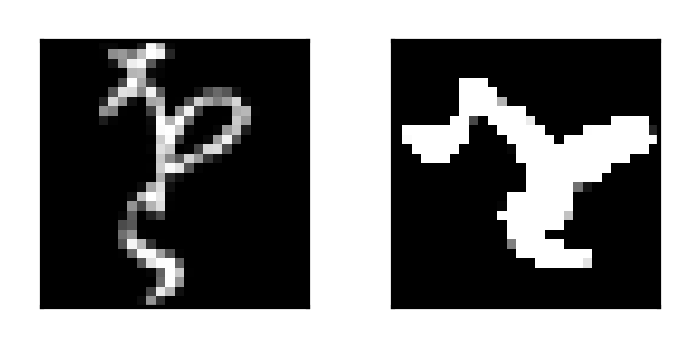

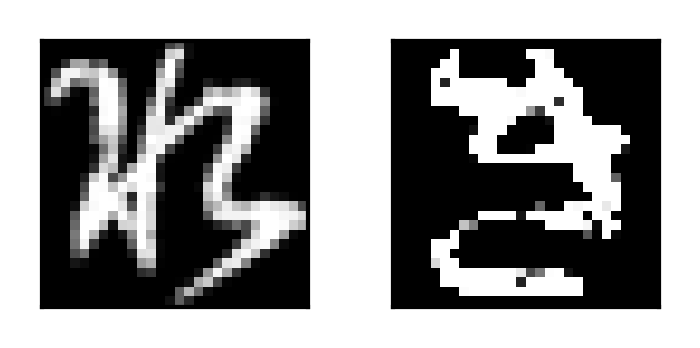

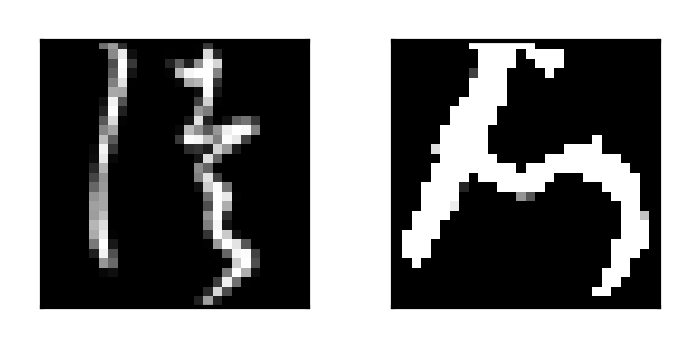

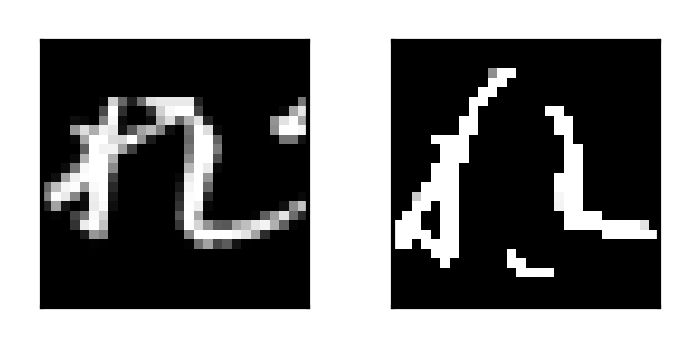

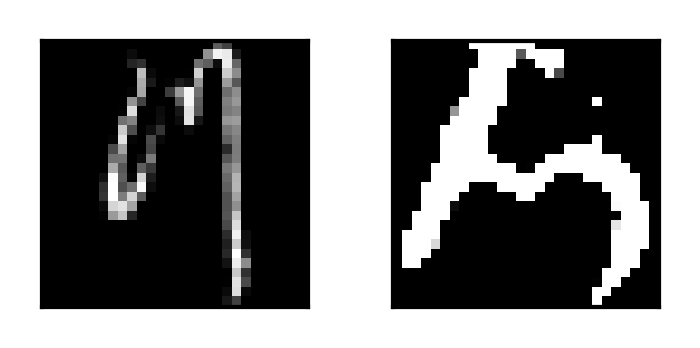

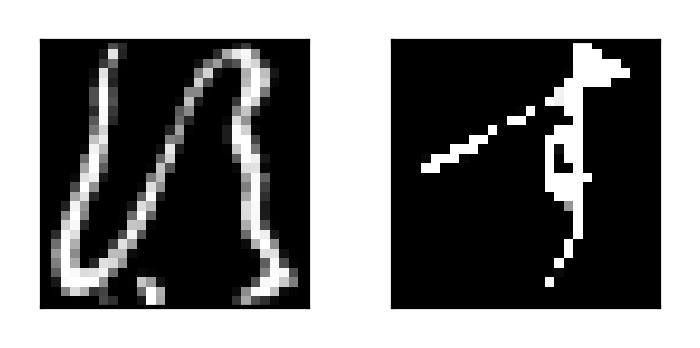

In [51]:
b_test_data_x = X_test.reshape(data_shape)
decoded_imgs = autoencoder.predict(b_test_data_x)
for i in range(10):
    if y_test_data[i] == 1:
        
        plt.figure(figsize=(2, 1), dpi=380)
        ax = plt.subplot(1, 2, 1)
        plt.imshow(X_test[i].reshape(28, 28))

        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(1, 2, 2)
        plt.imshow(decoded_imgs[i].reshape(28, 28))

        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)     
        
        
        plt.tight_layout()
        plt.show()
        
        

In [ ]:

    
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(512, activation='relu',activity_regularizer=regularizers.l1(10e-8))(input_img)
encoded = layers.Dense(384, activation='relu',activity_regularizer=regularizers.l1(10e-8))(encoded)
encoded = layers.Dense(256, activation='relu',activity_regularizer=regularizers.l1(10e-8))(encoded)
encoded = layers.Dense(64, activation='linear',activity_regularizer=regularizers.l1(10e-8))(encoded)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(train_X, train_ground,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(valid_X,valid_ground))
    

In [70]:
for i in range(10):
    print("**************current input number is ", i)
    X_test_tmp = X_test[Y_test==i]
    Y_test_tmp = Y_test[Y_test==i]

        data_tmp_shape = (X_test_tmp.shape[0], 784)

    measure_perf_and_time(X_test_tmp, Y_test_tmp, data_tmp_shape, 2)

('**************current input number is ', 0)
('accuracy is ', array([0.80299999]))
('the distribution of exit number is ', [array([1000,    0])])
('branchynet running time(s) is ', 1.6042778491973877)
('total time(s) is ', 1.738996982574463)
CPU used in 1 seconds: 95.3
('**************current input number is ', 1)
('accuracy is ', array([0.626]))
('the distribution of exit number is ', [array([1000,    0])])
('branchynet running time(s) is ', 1.4546191692352295)
('total time(s) is ', 1.6026389598846436)
CPU used in 1 seconds: 95.1
('**************current input number is ', 2)
('accuracy is ', array([0.759]))
('the distribution of exit number is ', [array([1000,    0])])
('branchynet running time(s) is ', 1.4206349849700928)
('total time(s) is ', 1.5498600006103516)
CPU used in 1 seconds: 96.9
('**************current input number is ', 3)
('accuracy is ', array([0.90399999]))
('the distribution of exit number is ', [array([1000,    0])])
('branchynet running time(s) is ', 1.50907087326

In [ ]:
('accuracy is ', array([0.9226]))
('the distribution of exit number is ', [array([7532, 2468])])
('branchynet running time(s) i ', 28.145965099334717)
('total time(s) is ', 29.104530811309814)
CPU used in 29 seconds: 96.0
('accuracy is ', array([0.92199999]))
('the distribution of exit number is ', [array([10000,     0])])
('branchynet running time(s) is ', 18.179352045059204)
('total time(s) is ', 18.97394895553589)
CPU used in 18 seconds: 95.2
    
('accuracy is ', array([0.92499999]))
('the distribution of exit number is ', [array([10000,     0])])
('branchynet running time(s) is ', 18.498135089874268)
('total time(s) is ', 19.237569093704224)
CPU used in 19 seconds: 95.4

In [ ]:

# the next experiment for convolutional NN

In [45]:
# measure performance data,all data go into different exits
measure_perf_and_time(X_test, Y_test, (-1, 784), 2)


CPU used in 0 seconds: 16.4
('accuracy is ', array([0.92499999]))
('branchyNet time is ', array([3.95138192]))
('the distribution of exit number is ', [array([10000,     0])])
CPU used in 19 seconds: 98.8


('total time(s) is ', array([4.83758998]))




array([0.92499999])

In [ ]:
for i in range(10):
    print("**************current input number is ", i)
    X_test_tmp = X_test[Y_test==i]
    Y_test_tmp = Y_test[Y_test==i]

    data_tmp_shape = (X_test_tmp.shape[0], 28, 28, 1)

    measure_perf_and_time(X_test_tmp, Y_test_tmp, data_tmp_shape)

In [ ]:
for i in range(10):
    print("**************current input number is ", i)
    X_test_tmp = X_test[Y_test==i]
    Y_test_tmp = Y_test[Y_test==i]

    data_tmp_shape = (X_test_tmp.shape[0], 28, 28, 1)

    measure_perf_and_time(X_test_tmp, Y_test_tmp, data_tmp_shape, 2)

In [46]:

# measure branchyNet
measure_performance_branchynet(X_test, Y_test)
# measure BranchyNet with early exit
measure_performance_branchynet(X_test, Y_test, 2)
# measure LeNet
measure_performance_LeNet(X_test, Y_test)
# measure performance data,all data go into different exits
measure_perf_and_time(X_test, Y_test, (-1, 784), 2)

('accuracy is ', array([0.9205]))
('branchyNet time is ', array([13.51258516]))
('the distribution of exit number is ', [array([6308, 3692])])
CPU used in 29 seconds: 98.8


('accuracy is ', array([0.87389999]))
('branchyNet time is ', array([3.50764632]))
('the distribution of exit number is ', [array([10000,     0])])
CPU used in 18 seconds: 98.8


('LeNet accuracy is ', 0.9139999926686287)
('LeNet time is ', 18.59014630317688)


CPU used in 0 seconds: 21.1
('accuracy is ', array([0.92499999]))
('branchyNet time is ', array([3.58754134]))
('the distribution of exit number is ', [array([10000,     0])])
CPU used in 19 seconds: 98.7


('total time(s) is ', array([4.36111736]))




array([0.92499999])

In [50]:
# scale analysis, use part of training data 
    
def scale_analysis(percentile=0.1):

    X_test_part = []
    Y_test_part = []


    for i in range(10):
        X_test_part.append(X_test[Y_test == i][0:int(1000*percentile), :])
        Y_test_part.append(Y_test[Y_test == i][0:int(1000*percentile)])
    
    X_test_part = np.concatenate(X_test_part)
    Y_test_part = np.concatenate(Y_test_part).reshape(-1, )

    return measure_perf_and_time(X_test_part, Y_test_part, (-1, 784), 2)
    
acc = []
run_time = []
for i in range(1, 11, 1):
    _acc, _time = scale_analysis(i/10.0)
    acc.append(_acc)
    run_time.append(_time)
print(list(map(lambda x: x[0], acc)))
print(list(map(lambda x: x[0], run_time)))

CPU used in 0 seconds: 21.8
('accuracy is ', array([0.92099999]))
('branchyNet time is ', array([0.41268969]))
('the distribution of exit number is ', [array([1000,    0])])
CPU used in 2 seconds: 98.8


('total time(s) is ', array([0.52258873]))


CPU used in 0 seconds: 56.9
('accuracy is ', array([0.92099999]))
('branchyNet time is ', array([0.81262112]))
('the distribution of exit number is ', [array([2000,    0])])
CPU used in 4 seconds: 99.2


('total time(s) is ', array([0.98759127]))


CPU used in 0 seconds: 46.2
('accuracy is ', array([0.92666666]))
('branchyNet time is ', array([1.16618729]))
('the distribution of exit number is ', [array([3000,    0])])
CPU used in 5 seconds: 99.0


('total time(s) is ', array([1.42730117]))


CPU used in 0 seconds: 38.3
('accuracy is ', array([0.92449999]))
('branchyNet time is ', array([1.4631114]))
('the distribution of exit number is ', [array([4000,    0])])
CPU used in 7 seconds: 98.8


('total time(s) is ', array([1.78609347]))


CPU u

In [47]:
# scale analysis, use part of training data 
    
def scale_analysis(percentile=0.1):

    X_test_part = []
    Y_test_part = []


    for i in range(10):
        X_test_part.append(X_test[Y_test == i][0:int(1000*percentile), :])
        Y_test_part.append(Y_test[Y_test == i][0:int(1000*percentile)])
    
    X_test_part = np.concatenate(X_test_part)
    Y_test_part = np.concatenate(Y_test_part).reshape(-1, )

    acc, diff = measure_performance_branchynet(X_test_part, Y_test_part)
    print("running time(s) is ", diff)
    return acc,  diff

acc = []
run_time = []
for i in range(1, 11, 1):
    _acc, _time = scale_analysis(i/10.0)
    acc.append(_acc)
    run_time.append(_time)
print(list(map(lambda x: x[0], acc)))
print(list(map(lambda x: x[0], run_time)))

('accuracy is ', array([0.922]))
('branchyNet time is ', array([1.64907861]))
('the distribution of exit number is ', [array([635, 365])])
CPU used in 3 seconds: 99.2


('running time(s) is ', array([1.64907861]))
('accuracy is ', array([0.922]))
('branchyNet time is ', array([2.51473546]))
('the distribution of exit number is ', [array([1248,  752])])
CPU used in 5 seconds: 98.3


('running time(s) is ', array([2.51473546]))
('accuracy is ', array([0.92066667]))
('branchyNet time is ', array([4.63913298]))
('the distribution of exit number is ', [array([1877, 1123])])
CPU used in 9 seconds: 99.1


('running time(s) is ', array([4.63913298]))
('accuracy is ', array([0.921]))
('branchyNet time is ', array([5.16554618]))
('the distribution of exit number is ', [array([2524, 1476])])
CPU used in 11 seconds: 98.7


('running time(s) is ', array([5.16554618]))
('accuracy is ', array([0.9204]))
('branchyNet time is ', array([6.56226373]))
('the distribution of exit number is ', [array([3165,

In [ ]:
# check model 5-9 for data 







In [ ]:
#combine more data 